In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ''

from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()

2024-10-12 09:08:29.835262: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 09:08:32.679134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-10-12 09:08:32.679780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-10-12 09:08:32.679801: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


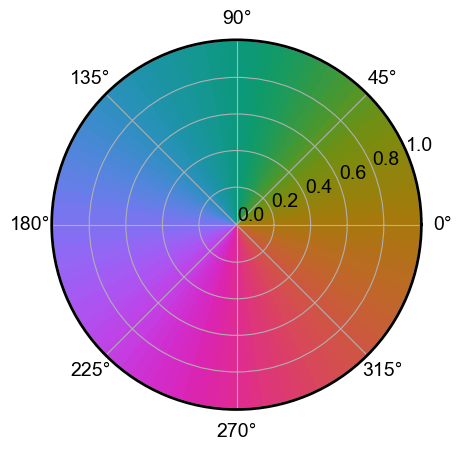

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from matplotlib.colors import Normalize

# Create a polar coordinate grid
theta = np.linspace(0, 2 * np.pi, 100)  # Angle from 0 to 2*pi
r = np.linspace(0, 1, 100)              # Radius from 0 to 1
Theta, R = np.meshgrid(theta, r)

# Data for the colormap (use Theta to warp the colormap around the circle)
Z = Theta

# Alpha varies from 0 at the center to 1 at the edge
Alpha = R / R.max()

# Get the colormap
cmap = cmocean.cm.phase_r

# Normalize Z to map to the colormap
norm = Normalize(vmin=Z.min(), vmax=Z.max())

# Create the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
mesh = ax.pcolormesh(Theta, R, Z, shading='auto', cmap=cmap, norm=norm)

# Modify the alpha channel of the facecolors
# Get the facecolors from the QuadMesh object
colors = mesh.get_facecolors()

alphas = Alpha[:-1, :-1].ravel()

fig.savefig('/home/hpinkard_waller/figures/black_hole/colormap.pdf', transparent=True)

In [6]:
R.shape

(500, 500)

In [3]:
rgba_colors

array([[[0.65830839, 0.46993917, 0.04941288, 0.        ],
        [0.65830839, 0.46993917, 0.04941288, 0.        ],
        [0.65121289, 0.47406244, 0.05044367, 0.        ],
        ...,
        [0.66433742, 0.4662019 , 0.05766473, 0.        ],
        [0.65830839, 0.46993917, 0.04941288, 0.        ],
        [0.65830839, 0.46993917, 0.04941288, 0.        ]],

       [[0.65830839, 0.46993917, 0.04941288, 0.00200803],
        [0.65830839, 0.46993917, 0.04941288, 0.00200803],
        [0.65121289, 0.47406244, 0.05044367, 0.00200803],
        ...,
        [0.66433742, 0.4662019 , 0.05766473, 0.00200803],
        [0.65830839, 0.46993917, 0.04941288, 0.00200803],
        [0.65830839, 0.46993917, 0.04941288, 0.00200803]],

       [[0.65830839, 0.46993917, 0.04941288, 0.00401606],
        [0.65830839, 0.46993917, 0.04941288, 0.00401606],
        [0.65121289, 0.47406244, 0.05044367, 0.00401606],
        ...,
        [0.66433742, 0.4662019 , 0.05766473, 0.00401606],
        [0.65830839, 0.469939